In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [105]:
Matches=pd.read_csv("matches.csv")

In [106]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many rows and columns are there?


In [107]:
Matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [108]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [109]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


# 756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [110]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

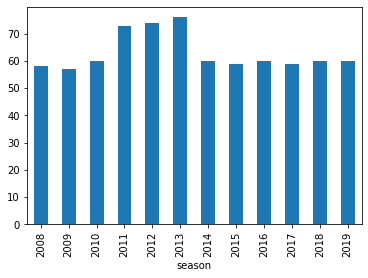

In [111]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [112]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [113]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.

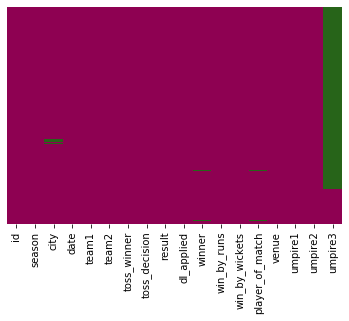

In [114]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

In [115]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# Removed the columns containing more missing values and have less impact on the predicting matches


In [116]:
Matchess=Matches.drop(['umpire3','city'],axis=1)

In [117]:
Matchess.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


# No missing values are there(well some small amount are still there but will not have impact on Today's match)

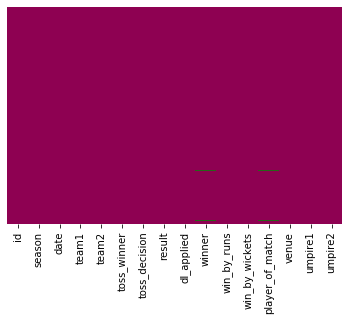

In [118]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

# Today's match is between Rcb and KKr.so we only want information between the matches that take place between them

In [125]:
Rcb_Kkr1=Matches.loc[(Matches['team1']=='Royal Challengers Bangalore')&(Matches['team2'] =='Kolkata Knight Riders')]
Rcb_Kkr1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
44,45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
177,178,2010,Kolkata,2010-03-14,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,MK Tiwary,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN
440,441,2013,Ranchi,2013-05-12,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,JH Kallis,JSCA International Stadium Complex,NJ Llong,K Srinath,NaN
605,606,2016,Bangalore,2016-05-02,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,AD Russell,M Chinnaswamy Stadium,M Erasmus,S Ravi,NaN
638,7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
664,7922,2018,Bengaluru,29/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,CA Lynn,M Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Virender Kumar Sharma
712,11153,2019,Bengaluru,05/04/19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,AD Russell,M. Chinnaswamy Stadium,Anil Chaudhary,Chris Gaffaney,O Nandan
730,11326,2019,Kolkata,19/04/19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Royal Challengers Bangalore,10,0,V Kohli,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar


In [124]:
Rcb_Kkr2=Matches.loc[(Matches['team2']=='Royal Challengers Bangalore')&(Matches['team1'] =='Kolkata Knight Riders')]

In [126]:
Rcb_Kkr2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
87,88,2008,Kolkata,2008-05-08,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly,Eden Gardens,Asad Rauf,IL Howell,NaN
133,134,2009,Durban,2009-04-29,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Kingsmead,MR Benson,TH Wijewardene,NaN
155,156,2009,Centurion,2009-05-12,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,LRPL Taylor,SuperSport Park,M Erasmus,SS Hazare,NaN
216,217,2010,Bangalore,2010-04-10,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,R Vinay Kumar,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
257,258,2011,Kolkata,2011-04-22,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin,NaN
290,291,2011,Bangalore,2011-05-14,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN
316,317,2012,Bangalore,2012-04-10,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,42,0,L Balaji,M Chinnaswamy Stadium,S Ravi,RJ Tucker,NaN
343,344,2012,Kolkata,2012-04-28,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,47,0,G Gambhir,Eden Gardens,Asad Rauf,BR Doctrove,NaN


In [129]:
Rcb_Kkr=Rcb_Kkr1.append(Rcb_Kkr2)

# Complete details of matches that takes place between Rcb and kkr

In [130]:
Rcb_Kkr

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
44,45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
177,178,2010,Kolkata,2010-03-14,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,MK Tiwary,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN
440,441,2013,Ranchi,2013-05-12,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,JH Kallis,JSCA International Stadium Complex,NJ Llong,K Srinath,NaN
605,606,2016,Bangalore,2016-05-02,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,AD Russell,M Chinnaswamy Stadium,M Erasmus,S Ravi,NaN
638,7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
664,7922,2018,Bengaluru,29/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,CA Lynn,M Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Virender Kumar Sharma
712,11153,2019,Bengaluru,05/04/19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,AD Russell,M. Chinnaswamy Stadium,Anil Chaudhary,Chris Gaffaney,O Nandan
730,11326,2019,Kolkata,19/04/19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Royal Challengers Bangalore,10,0,V Kohli,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN


In [131]:
Rcb_Kkr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 44 to 623
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               24 non-null     int64 
 1   season           24 non-null     int64 
 2   city             24 non-null     object
 3   date             24 non-null     object
 4   team1            24 non-null     object
 5   team2            24 non-null     object
 6   toss_winner      24 non-null     object
 7   toss_decision    24 non-null     object
 8   result           24 non-null     object
 9   dl_applied       24 non-null     int64 
 10  winner           24 non-null     object
 11  win_by_runs      24 non-null     int64 
 12  win_by_wickets   24 non-null     int64 
 13  player_of_match  24 non-null     object
 14  venue            24 non-null     object
 15  umpire1          24 non-null     object
 16  umpire2          24 non-null     object
 17  umpire3          4 non-null      ob

In [133]:
print("No of matches that takes place between Rcb and kkr:",len(Rcb_Kkr))

No of matches that takes place between Rcb and kkr 24


# Below plot gives the details of the match that takes place between kkr and Rcb

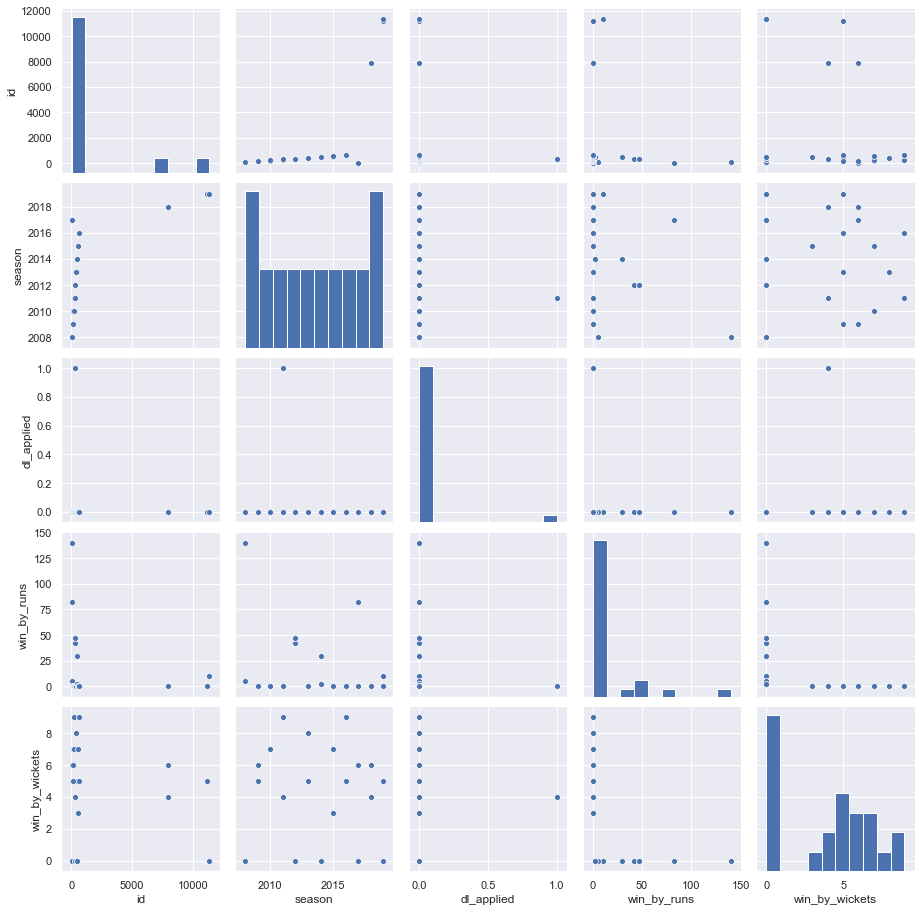

In [247]:
sns.pairplot(data=Rcb_Kkr)

# Now Time to answer the questions that were asked in the widhya ipl

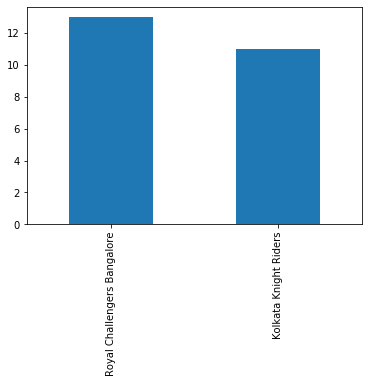

In [134]:
Rcb_Kkr['toss_winner'].value_counts().plot(kind='bar')

In [144]:
print("No of times toss won by both teams:")
Rcb_Kkr['toss_winner'].value_counts()

No of times toss won by both teams:


Royal Challengers Bangalore    13
Kolkata Knight Riders          11
Name: toss_winner, dtype: int64

# 13 Times Rcb won the Toss and they decided to field first all the times whereas KKr won the toss 11 times .out of 11 they chose 8 times to field and 3 times to bat

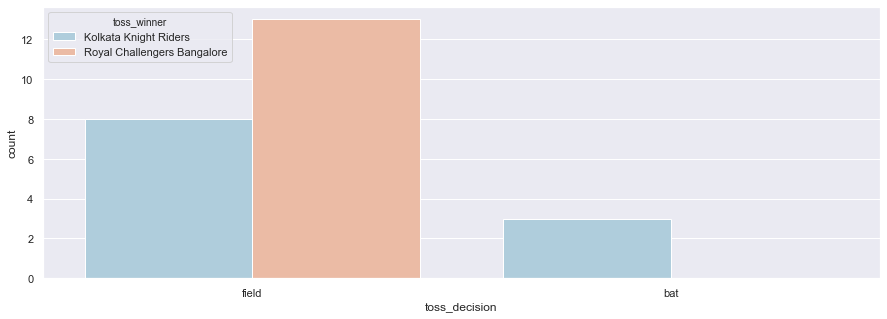

In [143]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_decision',hue='toss_winner',data=Rcb_Kkr,palette='RdBu_r')


# KKr went on to win the match 12 times when they decided to  field first and 2 times on batting first .so total it is (kkr=won-14,loss-10)whereas for rcb they won the match 9times by fielding first and 1 by batting first for Rcb it is (RCb=won-10,loss=14)

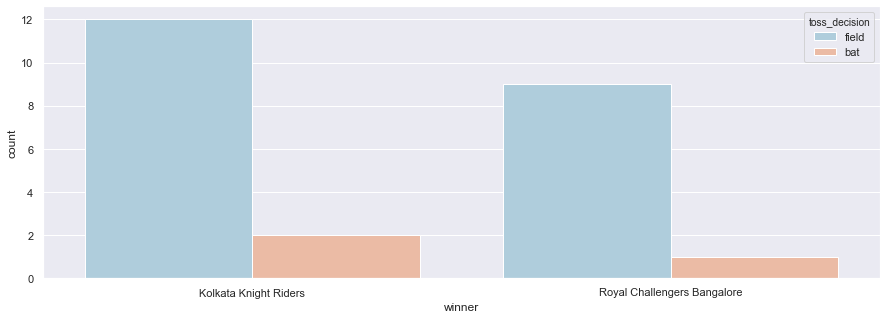

In [145]:
sns.countplot(x='winner',hue='toss_decision',data=Rcb_Kkr,palette='RdBu_r')

# Now it's time to move onto deliveries data sets

In [146]:
Deliveries=pd.read_csv("deliveries.csv")

In [148]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [163]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Filtering the match details that only takes place between Kolkata Knight Riders and Royal Challengers Bangalore

In [158]:
RCB_KKR1=Deliveries.loc[(Deliveries['batting_team' ] =='Kolkata Knight Riders' ) & (Deliveries['bowling_team'] == 'Royal Challengers Bangalore')]

In [159]:
RCB_KKR1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6254,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6255,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6256,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6257,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6258,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173253,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,2,N Rana,AD Russell,M Ali,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173254,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,3,AD Russell,N Rana,M Ali,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173255,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,4,AD Russell,N Rana,M Ali,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
173256,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,20,5,AD Russell,N Rana,M Ali,0,...,0,0,0,0,0,0,0,AD Russell,run out,V Kohli


In [160]:
RCB_KKR2=Deliveries.loc[(Deliveries['bowling_team' ] =='Kolkata Knight Riders' ) & (Deliveries['batting_team'] == 'Royal Challengers Bangalore')]

In [162]:
RCB_KKR2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6375,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,CH Gayle,V Kohli,NM Coulter-Nile,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN
6376,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,CH Gayle,V Kohli,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6377,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,CH Gayle,V Kohli,NM Coulter-Nile,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
6378,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,V Kohli,CH Gayle,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,V Kohli,caught,MK Pandey
6379,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,Mandeep Singh,CH Gayle,NM Coulter-Nile,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173125,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,2,MP Stoinis,V Kohli,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
173126,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,3,MP Stoinis,V Kohli,H Gurney,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173127,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,4,MP Stoinis,V Kohli,H Gurney,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173128,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,5,V Kohli,MP Stoinis,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [164]:
RCB_KKR=RCB_KKR1.append(RCB_KKR2)

In [165]:
RCB_KKR

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6254,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6255,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6256,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6257,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6258,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173125,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,2,MP Stoinis,V Kohli,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
173126,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,3,MP Stoinis,V Kohli,H Gurney,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173127,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,4,MP Stoinis,V Kohli,H Gurney,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173128,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,5,V Kohli,MP Stoinis,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [166]:
RCB_KKR.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6254,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6255,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [171]:
RCB_KKR.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.016514,0.043803,0.008626,NaN,0.019881,-0.012296,-0.006108,-0.004281,NaN,0.073866,0.007927,0.075382
inning,0.016514,1.000000,-0.054640,0.010071,NaN,0.023962,-0.017526,0.018042,0.016166,NaN,-0.009904,0.025441,-0.004407
over,0.043803,-0.054640,1.000000,-0.004870,NaN,-0.011904,0.029080,-0.013627,0.026020,NaN,0.105053,-0.002415,0.104264
ball,0.008626,0.010071,-0.004870,1.000000,NaN,0.001300,0.011761,0.000645,0.002366,NaN,0.037275,0.005548,0.038373
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,0.019881,0.023962,-0.011904,0.001300,NaN,1.000000,-0.006263,-0.015591,-0.009950,NaN,-0.074817,0.780148,0.093171
bye_runs,-0.012296,-0.017526,0.029080,0.011761,NaN,-0.006263,1.000000,-0.004140,-0.002642,NaN,-0.029853,0.312830,0.037508
legbye_runs,-0.006108,0.018042,-0.013627,0.000645,NaN,-0.015591,-0.004140,1.000000,-0.006578,NaN,-0.062522,0.494957,0.044095
noball_runs,-0.004281,0.016166,0.026020,0.002366,NaN,-0.009950,-0.002642,-0.006578,1.000000,NaN,0.026854,0.166304,0.062554
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

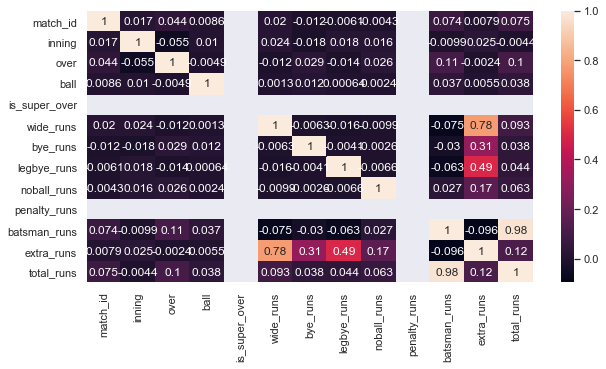

In [174]:
plt.figure(figsize=(10,5))
sns.heatmap(RCB_KKR.corr(),yticklabels=True,annot=True)

# To get how many runs Dinesh karthick scored against Royal challengers bangalore

In [192]:
Dinesh_karthick_runs_Scored=Deliveries.loc[(Deliveries['batting_team' ] =='Kolkata Knight Riders' )& (Deliveries['bowling_team']=="Royal Challengers Bangalore") &(Deliveries['batsman']=="KD Karthik")]

In [194]:
Dinesh_karthick_runs_Scored

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
151113,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,8,5,KD Karthik,N Rana,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
151114,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,8,6,KD Karthik,N Rana,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
151115,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,1,KD Karthik,N Rana,K Khejroliya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
151117,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,3,KD Karthik,N Rana,K Khejroliya,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
151119,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,5,KD Karthik,N Rana,K Khejroliya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
151120,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,6,KD Karthik,N Rana,K Khejroliya,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
151121,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,7,KD Karthik,N Rana,K Khejroliya,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
151124,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,10,3,KD Karthik,N Rana,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
151128,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,11,1,KD Karthik,N Rana,Washington Sundar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
151132,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,11,5,KD Karthik,N Rana,Washington Sundar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [195]:
Dinesh_karthick_runs_Scored.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
151113,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,8,5,KD Karthik,N Rana,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
151114,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,8,6,KD Karthik,N Rana,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# It look's like a total of 82 runs was scored by Dinesh karthick against bangalore from 4 matches (2018-2019).

In [203]:
Dinesh_karthick_runs_Scored['batsman_runs'].sum()

82

# well Dinesh karthick average score was less because he only played 4 matches against Banglore while captaining KKR(2018-2019)

In [197]:
Dinesh_karthick_runs_Scored['batsman_runs'].mean()

1.4385964912280702

In [198]:
Dinesh_karthick_runs_Scored['batsman_runs'].median()

1.0

# From the above graph Dinesh Karthick scored minimum of 1 run and maximum of 6(outlier)against saini.Against chahal the median is one and some fours are hitted in chahal's over same goes for washington sundar's (considered only some bowlers because they have more chances to play in today's game). 

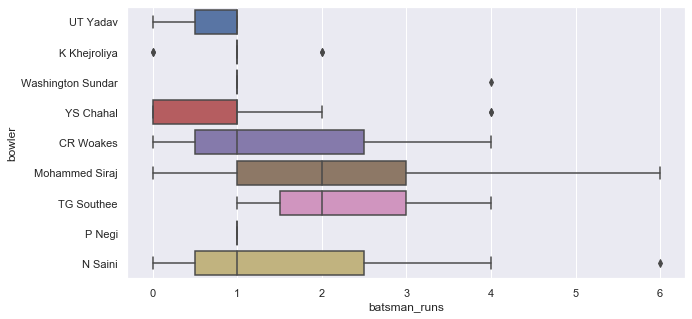

In [210]:
sns.set()
plt.figure(figsize=(10,5))
sns.boxplot(x='batsman_runs',y='bowler',data=Dinesh_karthick_runs_Scored)

# How many fours will kholi get today against kkr?

In [211]:
kohli_4s=Deliveries.loc[(Deliveries['bowling_team' ] =='Kolkata Knight Riders' )& (Deliveries['batting_team']=="Royal Challengers Bangalore") &(Deliveries['batsman']=="V Kohli")]

In [214]:
kohli_4s.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6378,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,V Kohli,CH Gayle,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,V Kohli,caught,MK Pandey
10408,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,V Kohli,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [227]:
kohli_4s['batsman_runs']==4

6378      False
10408     False
10409     False
10410     False
10411     False
          ...  
173121    False
173122    False
173124    False
173128     True
173129    False
Name: batsman_runs, Length: 515, dtype: bool

In [241]:
kohli_4ss=kohli_4s.groupby('batsman_runs')

In [243]:
kohli_4ss.sum()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs
batsman_runs,,,,,,,,,,,,
0,466619,279,1307,612,0,3,0,5,0,0,8,8
1,892063,312,2091,762,0,0,0,1,1,0,2,217
2,228701,59,484,146,0,0,0,0,0,0,0,90
3,990,4,13,8,0,0,0,0,0,0,0,6
4,265140,86,566,174,0,0,0,0,0,0,0,232
6,104998,34,279,78,0,0,0,0,0,0,0,132


# kohli scored 232 runs by hitting boundaris alone that means (Total 4's:232/4=58)

In [244]:
kohli_4ss.count()#kohli scored 58 boundaries against kkr bowlers 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
batsman_runs,,,,,,,,,,,,,,,,,,,,
0,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,18,18,12
1,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,0,0,0
2,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,0,0,0
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0
4,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,0,0,0
6,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,0,0,0


# kohli scored 58 fours against KKR

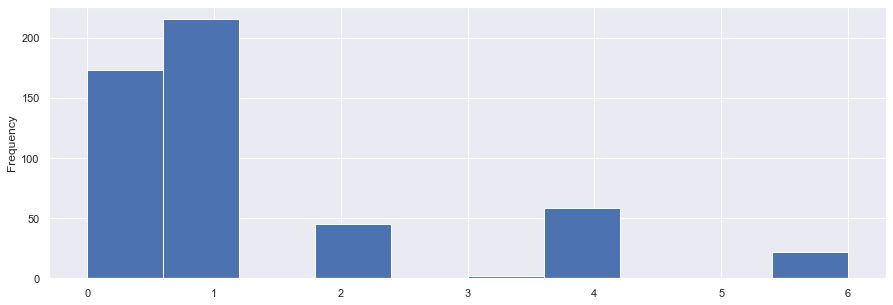

In [256]:
kohli_4s.loc[:,'batsman_runs'].plot(kind='hist')

# how many  No balls will be bowled ?

In [259]:
RCB_KKR.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6254,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6255,27,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,SP Narine,G Gambhir,S Badree,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


# It looks like bowlers bowling No balls were literally zero 

In [261]:
RCB_KKR['noball_runs'].mean()

0.004180298073427844

In [262]:
RCB_KKR['noball_runs'].median()

0.0

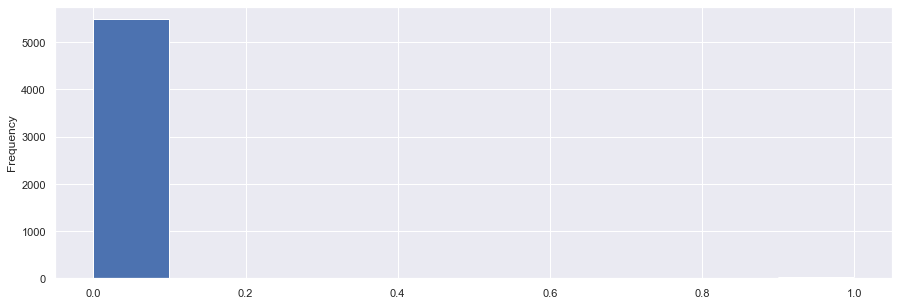

In [263]:
RCB_KKR['noball_runs'].plot(kind='hist')

# we can guess few answers from this analysis but the current form of players plays a huge role in matches.so i ll answer the questions based on this analysis and current form of the players